In [1]:
# Imports
import torch
import numpy as np
import jovian
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.optim as optim
from torch.autograd import Variable

In [2]:
data = pd.read_csv('Downloads\diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.shape

(53940, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
temp = data[['x','y','z']].replace(0,np.NaN)
temp.isnull().sum()

x     8
y     7
z    20
dtype: int64

In [8]:
data = data.loc[(data[['x','y','z']]!=0).all(axis=1)]
data.shape

(53920, 10)

In [9]:
#Just to confirm that there won't be any zero values rows
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


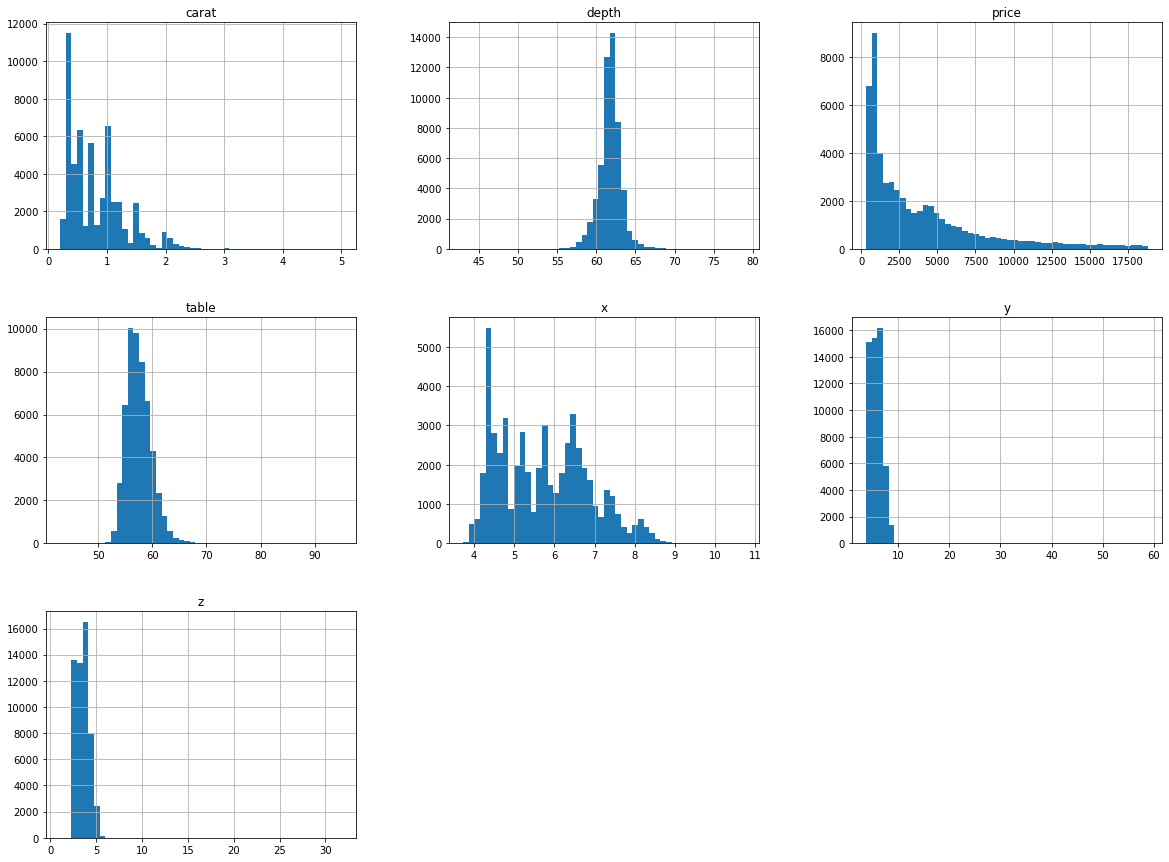

In [10]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

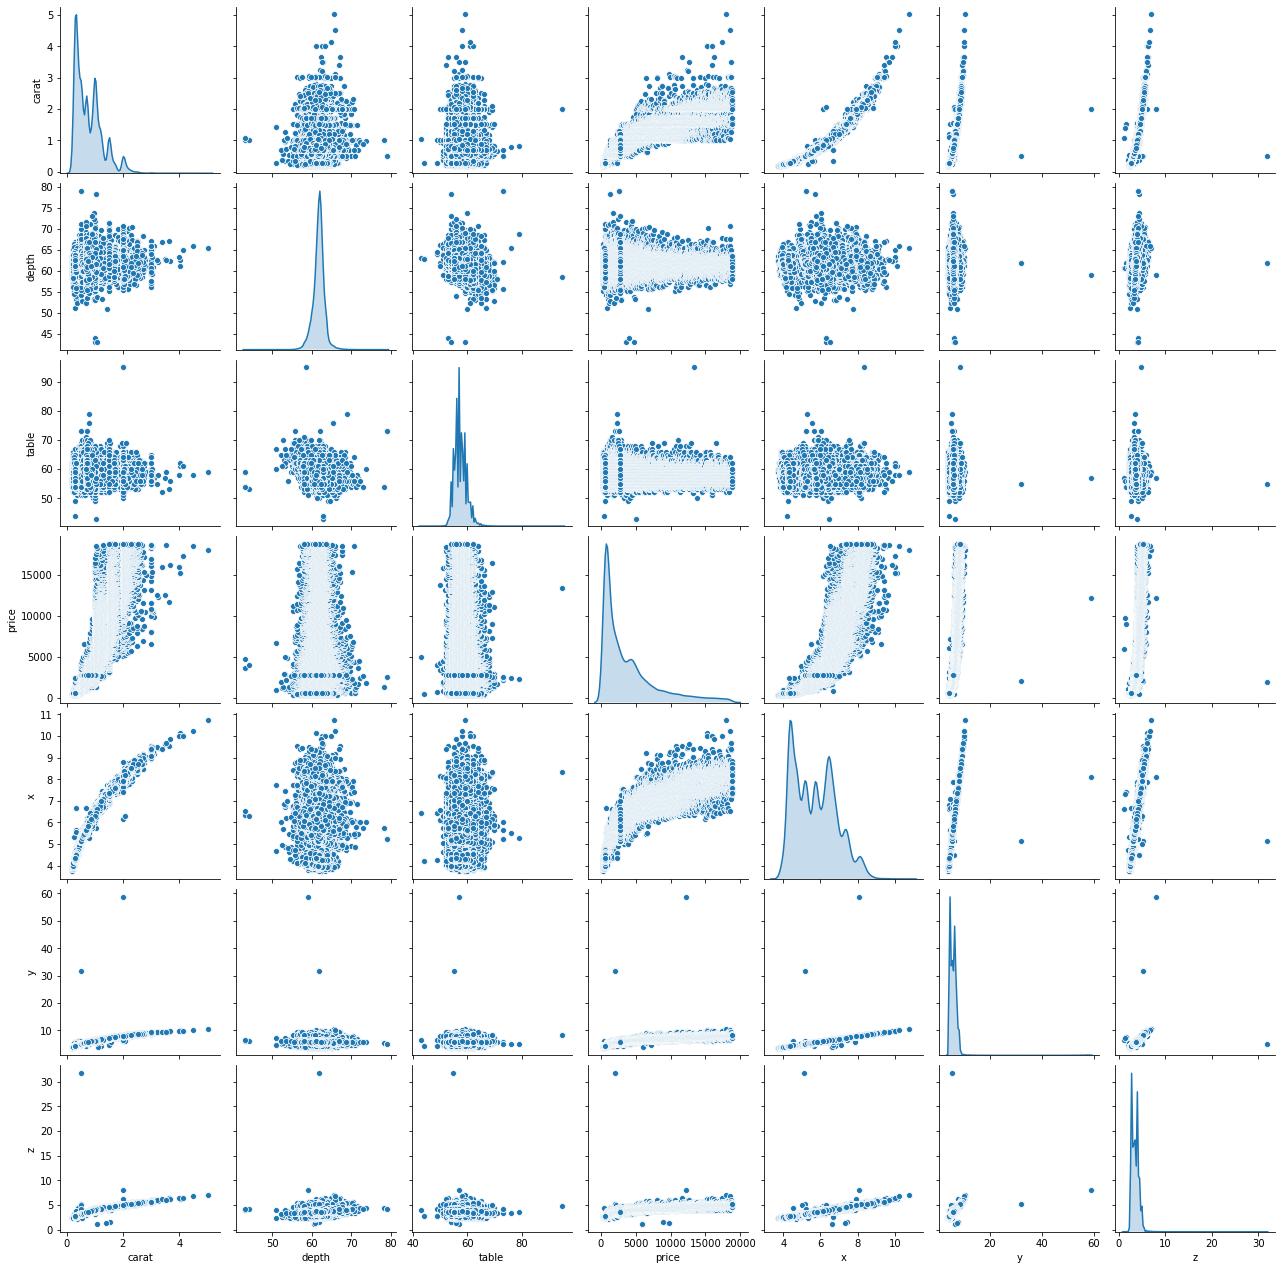

In [11]:
sns.pairplot(data , diag_kind = 'kde');

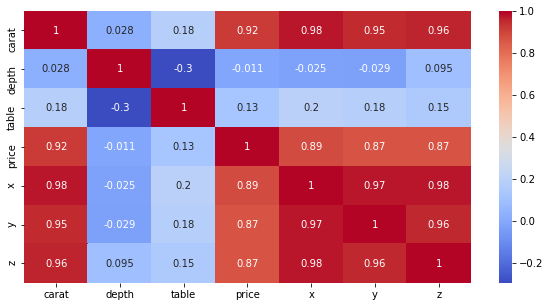

In [12]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),annot = True , cmap = 'coolwarm' );

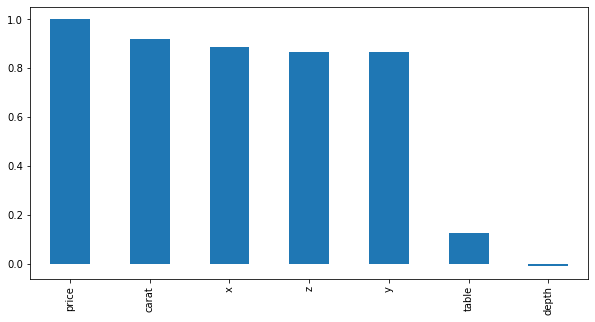

In [13]:
corr_mat = data.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

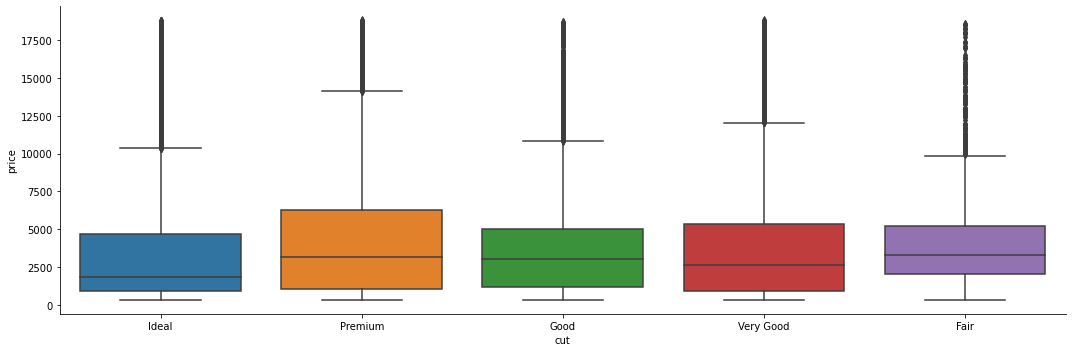

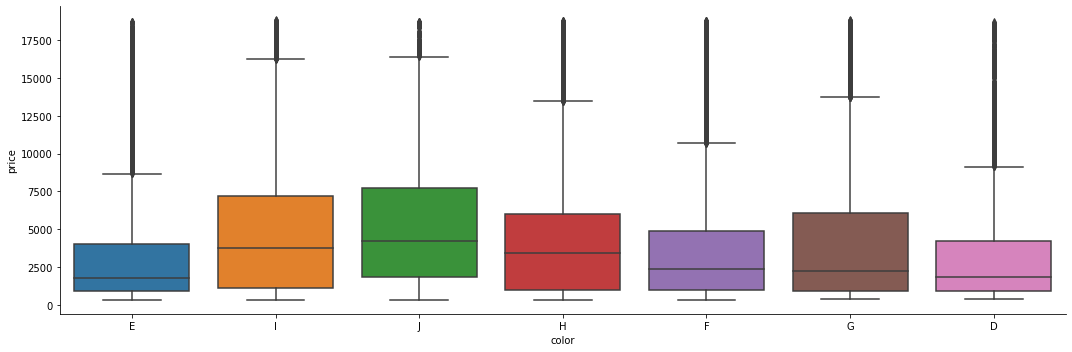

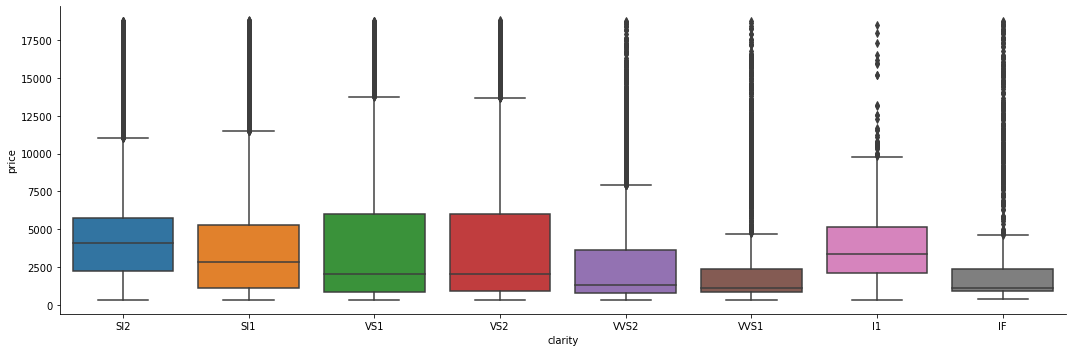

In [14]:
input_cat_columns = data.select_dtypes(include = ['object']).columns.tolist()

for col in input_cat_columns:
    sns.catplot(x=col, y="price",
            kind="box", dodge=False, height = 5, aspect = 3,data=data);

In [15]:
data_one_hot_encoding = pd.get_dummies(data)
data_one_hot_encoding.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [16]:
data_one_hot_encoding.columns.values

array(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype=object)

In [17]:
val_percent = 0.20 #Consider 15% of data as validation data
batch_size = 16
torch.manual_seed(99) # Set Seed for Reproducibility

In [18]:
#selected input cols to predict the diamond price
input_cols = data_one_hot_encoding.columns.values.tolist() # Converting the dataframe columns to list
input_cols.remove('price')
input_cols.remove('depth')

#Price is the target variable
output_col = ['price']

In [19]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy() #converting dataframes to numpy arrays
    targets_array = dataframe1[output_col].to_numpy()
    return inputs_array, targets_array

inputs_array, targets_array = dataframe_to_arrays(data_one_hot_encoding)

inputs_array.shape , targets_array.shape

((53920, 25), (53920, 1))

In [20]:
inputs_array.shape[0]

53920

In [21]:
# Convert to PyTorch dataset
dataset = TensorDataset(torch.tensor(inputs_array, dtype=torch.float32), torch.tensor(targets_array, dtype=torch.float32))

In [22]:
val_size = int(inputs_array.shape[0] * val_percent)
train_size = inputs_array.shape[0] - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])

train_loader =  DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size*2)

In [23]:
for xb, yb in train_loader:
    print(xb.shape)
    print(yb.shape)
    break

torch.Size([16, 25])
torch.Size([16, 1])


In [24]:
class DiamondPriceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fully_connected = nn.Linear(len(input_cols), len(output_col))
        
    def forward(self, x):
        fwd = self.fully_connected(x)  # Forward pass
        return fwd
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [25]:
model = DiamondPriceModel()
list(model.parameters())

[Parameter containing:
 tensor([[-0.0236,  0.0285,  0.0867, -0.0966, -0.1664, -0.1684,  0.1414, -0.1524,
          -0.1915, -0.1808,  0.1978, -0.1712, -0.0934,  0.1063,  0.1454,  0.0839,
           0.0492,  0.1027, -0.1967,  0.1332,  0.0705,  0.1790,  0.1119,  0.1888,
          -0.1859]], requires_grad=True),
 Parameter containing:
 tensor([-0.0753], requires_grad=True)]

In [26]:
epochs = 500
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


def hingeLoss(outputVal,dataOutput,model):
    loss1=torch.sum(torch.clamp(1 - torch.matmul(outputVal.t(),dataOutput),min=0))
    loss2=torch.sum(model.fully_connected.weight ** 2)  # l2 penalty
    totalLoss=loss1+loss2
    return(totalLoss)

X = (inputs_array).astype(np.float32)  # Convert X and Y to FloatTensors
Y = (targets_array).astype(np.float32)
history=[]
for epoch in range(epochs):
    # Training Phase 
    inputVal=Variable(torch.from_numpy(X))
    outputVal=Variable(torch.from_numpy(Y))
    modelOutput = model(inputVal)
    totalLoss=hingeLoss(outputVal,modelOutput,model)
    totalLoss.backward()
    optimizer.step()
    history.append(totalLoss.detach().numpy())
    print('epoch [{}], loss:{:.4f}'.format(epoch+1, totalLoss))

C:\Users\ciarr\anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


epoch [1], loss:0.4925
epoch [2], loss:0.4919
epoch [3], loss:0.4913
epoch [4], loss:0.4907
epoch [5], loss:0.4900
epoch [6], loss:0.4894
epoch [7], loss:0.4888
epoch [8], loss:0.4881
epoch [9], loss:0.4875
epoch [10], loss:0.4868
epoch [11], loss:0.4862
epoch [12], loss:0.4855
epoch [13], loss:0.4848
epoch [14], loss:0.4841
epoch [15], loss:0.4835
epoch [16], loss:0.4828
epoch [17], loss:0.4820
epoch [18], loss:0.4813
epoch [19], loss:0.4806
epoch [20], loss:0.4799
epoch [21], loss:0.4792
epoch [22], loss:0.4784
epoch [23], loss:0.4777
epoch [24], loss:0.4769
epoch [25], loss:0.4762
epoch [26], loss:0.4754
epoch [27], loss:0.4746
epoch [28], loss:0.4738
epoch [29], loss:0.4731
epoch [30], loss:0.4723
epoch [31], loss:0.4715
epoch [32], loss:0.4707
epoch [33], loss:0.4699
epoch [34], loss:0.4691
epoch [35], loss:0.4682
epoch [36], loss:0.4674
epoch [37], loss:0.4666
epoch [38], loss:0.4658
epoch [39], loss:0.4649
epoch [40], loss:0.4641
epoch [41], loss:0.4633
epoch [42], loss:0.4624
e

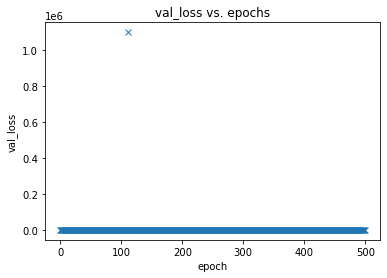

In [31]:
losses = [r for r in history]
plt.plot(losses, 'x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');